In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

In [2]:
def diff_RE(R1,R2):
    '''
    Given R1 and R2, here is the the code to return (D1,D2) 
    where D1 is the min DFA of Lang(R1)-Lang(R2)
    and D2 is the min DFA of Lang(R2)-Lang(R1)
    '''
    MD1=min_dfa_brz(nfa2dfa(re2nfa(R1)))
    MD2=min_dfa_brz(nfa2dfa(re2nfa(R2)))
    
    cMD1 = comp_dfa(MD1)
    cMD2 = comp_dfa(MD2)
    
    D1minus2 = min_dfa_brz(intersect_dfa(MD1, cMD2))
    D2minus1 = min_dfa_brz(intersect_dfa(MD2, cMD1))
    
    return (D1minus2, D2minus1)
    

Generating LALR tables


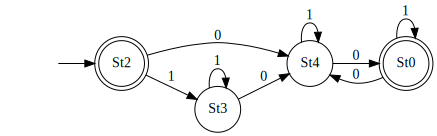

In [3]:
# Sigma = {0,1}; "2n zeros for n >= 0"

RE2 = "(1* 0 1* 0 1*)*"
m2 = min_dfa(nfa2dfa(re2nfa(RE2)))
dotObj_dfa(m2)

In [4]:
dotObj_dfa(m2).render('m2')

'm2.pdf'

Generating LALR tables


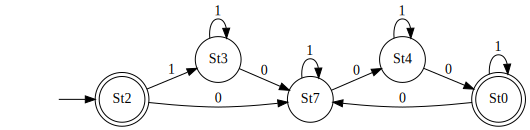

In [5]:
# 3n 0's, n >= 0

RE3 = "(1* 0 1* 0 1* 0 1*)*"
m3 = min_dfa(nfa2dfa(re2nfa(RE3)))
dotObj_dfa(m3)

In [6]:
dotObj_dfa(m3).render('m3')

'm3.pdf'

Generating LALR tables


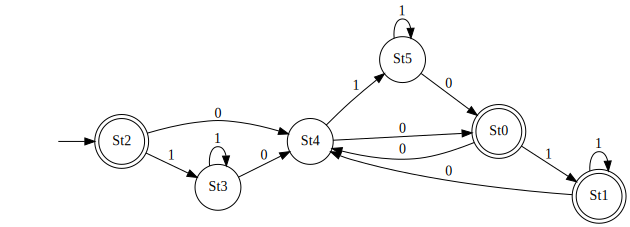

In [7]:
dfa2big = nfa2dfa(re2nfa(RE2))
dotObj_dfa(dfa2big)

In [8]:
dfa_unmin = md2mc('''

DFA
IF : 1  ->  St3
IF : 0  ->  St4
St4: 0  ->  F0
St4: 1  ->  St5
St3: 0  ->  St4
St3: 1  ->  St3
F0 : 0  ->  St4
F0 : 1  ->  F1
St5: 0  ->  F0
St5: 1  ->  St5
F1 : 0  ->  St4
F1 : 1  ->  F1
''')

In [9]:
dotObj_dfa(dfa_unmin).render('dfa_unmin')

'dfa_unmin.pdf'

In [10]:
dfa_min = min_dfa(dfa_unmin, state_name_mode = 'verbose', chatty=True)

Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  St4  and  IF  are 0-distinguished.
States  St4  and  F1  are 0-distinguished.
States  St4  and  F0  are 0-distinguished.
States  IF  and  St3  are 0-distinguished.
States  IF  and  St5  are 0-distinguished.
States  F1  and  St3  are 0-distinguished.
States  F1  and  St5  are 0-distinguished.
States  St3  and  F0  are 0-distinguished.
States  F0  and  St5  are 0-distinguished.
 
Seeing if states  St4  and  St3  can now be distinguished by any symbol.
   The next states reached via symbol  0  are:  F0  and  St4
   Found a distinguishable pair!
      Since  ('F0', 'St4')  are  0  distinguishable, marking  ('St4', 'St3')  as  1  distinguishable.
         Hence, must continue through one more sweep of the algorithm.
 
Seeing if states  St4  and  St5  can now be distinguished by any symbol.
   The next states reached via symbol  0  are:  F0  and  F0
      Nope. Symbol  0  

In [11]:
dfa_unmin_rev = rev_dfa(dfa_unmin)

In [12]:
dotObj_nfa(dfa_unmin_rev).render('dfa_unmin_rev')

'dfa_unmin_rev.pdf'

In [13]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



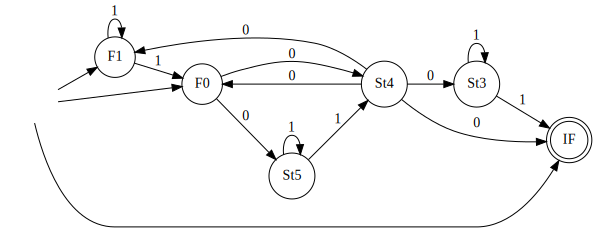

In [14]:
dotObj_nfa(dfa_unmin_rev)

In [15]:
dfa_unmin_rev_det = nfa2dfa(dfa_unmin_rev, STATENAME_MAXSIZE=80)

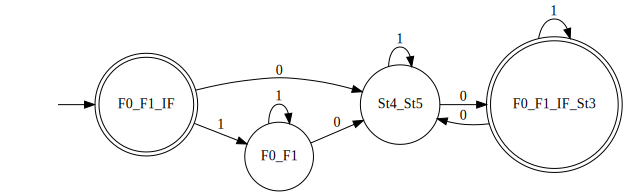

In [16]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80)

In [17]:
dotObj_dfa(dfa_unmin_rev_det, STATENAME_MAXSIZE=80).render('dfa_unmin_rev_det')

'dfa_unmin_rev_det.pdf'

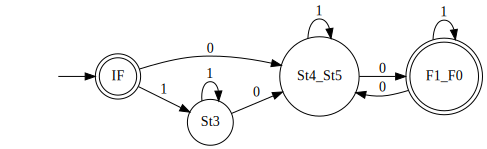

In [18]:
dotObj_dfa(dfa_min)

In [19]:
mEven0_mOdd0 = intersect_dfa(m2,m3)

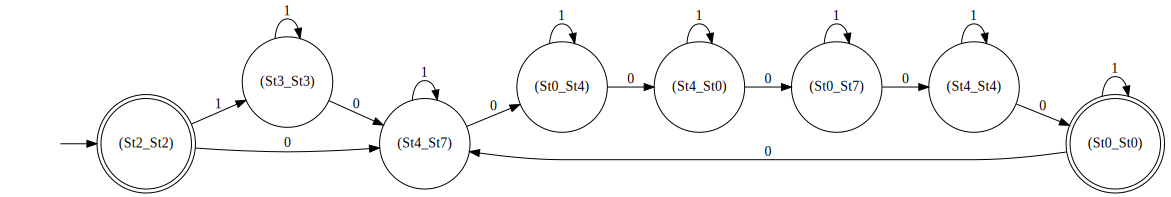

In [20]:
dotObj_dfa(mEven0_mOdd0)

In [21]:
dotObj_dfa(mEven0_mOdd0).render('m2_and_m3')

'm2_and_m3.pdf'

Generating LALR tables


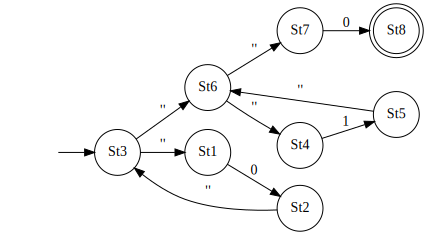

In [22]:
nfa0s1s0 = re2nfa("0* 1* 0")
dotObj_nfa(nfa0s1s0)

In [23]:
dotObj_nfa(nfa0s1s0).render('nfa0s1s0')

'nfa0s1s0.pdf'

In [24]:
dfa0s1s0 = nfa2dfa(nfa0s1s0, STATENAME_MAXSIZE=80)

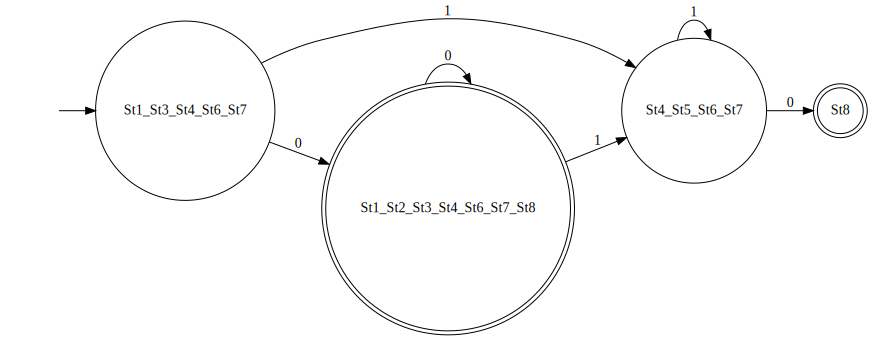

In [25]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80)

In [26]:
dotObj_dfa(dfa0s1s0, STATENAME_MAXSIZE=80).render('dfa0s1s0')

'dfa0s1s0.pdf'

In [27]:
no010 = md2mc('''
DFA
IF : 1 -> IF
IF : 0 -> F0

F0 : 0 -> F0
F0 : 1 -> F1

F1 : 0 -> BH
F1 : 1 -> IF

BH : 0|1 -> BH

''')

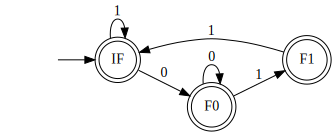

In [28]:
dotObj_dfa(no010)

In [29]:
dotObj_dfa(no010).render('no010')

'no010.pdf'

# To verify, define has010 and intersect.

In [30]:
has010 = min_dfa(nfa2dfa(re2nfa("(0+1)*010(010)*")))

Generating LALR tables


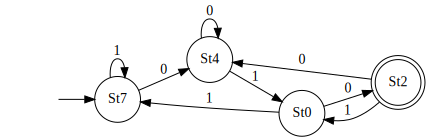

In [31]:
dotObj_dfa(has010)

In [32]:
no010_and_has010 = intersect_dfa(no010, has010)

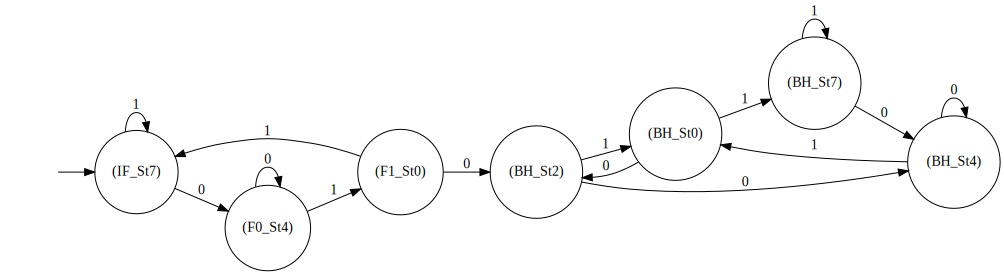

In [33]:
dotObj_dfa(no010_and_has010)

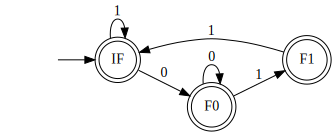

In [34]:
dotObj_dfa(no010)

In [35]:
REno010 =   "1* ( '' + 00* ( '' + 1(11*00*1)* ( '' + 11* ( '' + 00* ))))"

In [36]:
no010_RE = min_dfa(nfa2dfa(re2nfa(REno010)))

Generating LALR tables


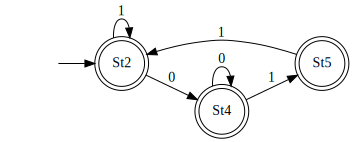

In [37]:
dotObj_dfa(no010_RE)

In [38]:
nfano010 = dfa2nfa(no010)

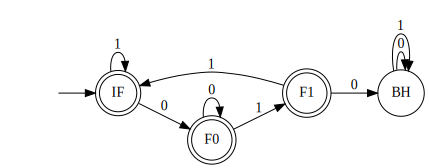

In [39]:
dotObj_nfa(nfano010)

In [40]:
gnfa010 = mk_gnfa(nfano010)

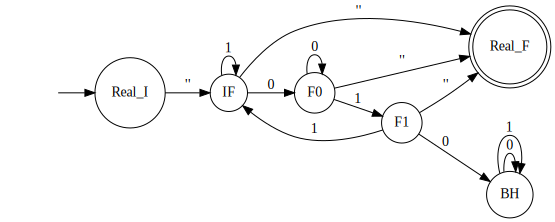

In [41]:
dotObj_gnfa(gnfa010)

In [42]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [43]:
(GF,DO,RE) = del_gnfa_states(gnfa010)

**** Eliminating state IF ****
**** Eliminating state F1 ****
**** Eliminating state F0 ****
**** Eliminating state BH ****


In [44]:
RE

'(((((1)* 0) (((((1 (1 ((1)* 0))) + 0) + 0))* (((1 (((1 (1)*) + "") + "")) + "") + ""))) + (1)*) + (1)*)'

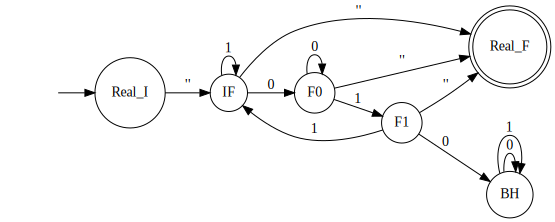

In [45]:
DO[0]

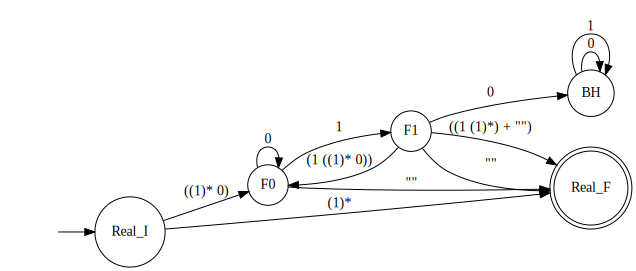

In [46]:
DO[1]

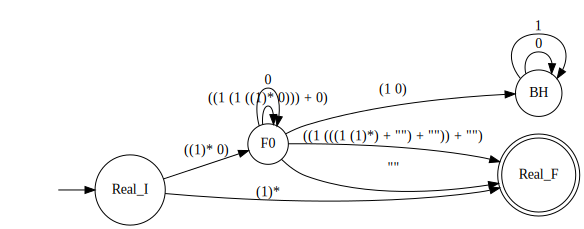

In [47]:
DO[2]

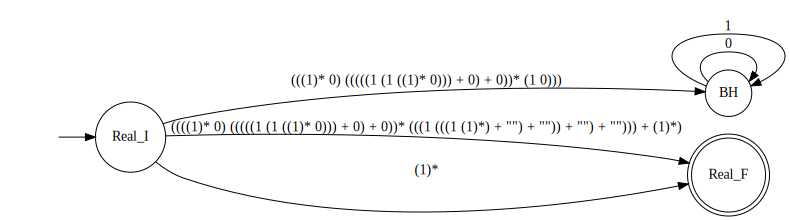

In [48]:
DO[3]